# Análise Exploratória de Dados de Filmes do IMDb

## 1. Apresentação dos Dados

### Fonte e Características

- **Fonte:** Este conjunto de dados compila informações dos filmes mais bem avaliados do IMDb (Internet Movie Database)  
- **Período:** 1960–2024  
- **Licença:** Dados públicos do IMDb  
- **Questões Éticas:** Dados públicos sobre produções cinematográficas, sem informações pessoais sensíveis  
- **Link:** https://basedosdados.org/dataset/6ba4745d-f131-4f8e-9e55-e8416199a6af?table=79de8c5e-9c21-4398-a9fb-bc40e6d6e77f

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Configurações iniciais
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

# Carregar dados
data = pd.read_csv('../data/world_best_movies.csv')
df = data.copy()

print("=== APRESENTAÇÃO DOS DADOS ===")
print(f"Período coberto: {df['year'].min()} - {df['year'].max()}")
print(f"Total de filmes: {len(df)}")
print(f"Colunas disponíveis: {len(df.columns)}")
print("\nColunas:")
print(df.columns.tolist())
display(df.head())

=== APRESENTAÇÃO DOS DADOS ===
Período coberto: 1960 - 2024
Total de filmes: 33600
Colunas disponíveis: 23

Colunas:
['id', 'title', 'link', 'year', 'duration', 'rating_mpa', 'rating_imdb', 'vote', 'budget', 'gross_world_wide', 'gross_us_canada', 'gross_opening_weekend', 'director', 'writer', 'star', 'genre', 'country_origin', 'filming_location', 'production_company', 'language', 'win', 'nomination', 'oscar']


,id,title,link,year,duration,rating_mpa,rating_imdb,vote,budget,gross_world_wide,...,writer,star,genre,country_origin,filming_location,production_company,language,win,nomination,oscar
0,tt0073470,Strip Nude for Your Killer,https://www.imdb.com/title/tt0073470,1975,1h 38m,Not Rated,5.60,33000.00,NaN,NaN,...,"Andrea Bianchi, Massimo Felisatti","Edwige Fenech, Nino Castelnuovo, Femi Benussi","Erotic Thriller, Giallo, Slasher Horror, Horro...",Italy,"Milan, Lombardia, Italy",FRAL Cinematografica,Italian,0,0,0
1,tt0072764,Carry on Behind,https://www.imdb.com/title/tt0072764,1975,1h 30m,Not Rated,5.60,31000.00,NaN,NaN,...,Dave Freeman,"Elke Sommer, Kenneth Williams, Bernard Bresslaw","Parody, Slapstick, Comedy",United Kingdom,"Bad Godesberg Way, Maidenhead, Berkshire, Engl...","The Rank Organisation, Peter Rogers Productions",English,0,0,0
2,tt0131526,"So Young, So Lovely, So Vicious...",https://www.imdb.com/title/tt0131526,1975,1h 30m,NaN,4.90,487.00,NaN,NaN,...,"Silvio Amadio, Roberto Natale","Gloria Guida, Dagmar Lassander, Fred Robsahm","Drama, Mystery, Thriller",Italy,"Sardinia, Italy",Domiziana Internazionale Cinematografica,Italian,0,0,0
3,tt0073335,Mahogany,https://www.imdb.com/title/tt0073335,1975,1h 49m,PG,6.10,23000.00,NaN,NaN,...,"John Byrum, Toni Amber","Diana Ross, Billy Dee Williams, Anthony Perkins","Drama, Romance",United States,Marshall Field Co Department Store 111 N Sta...,"Motown Productions, Nikor Productions, Paramou...","English, Italian",0,0,1
4,tt0073006,Foreplay,https://www.imdb.com/title/tt0073006,1975,1h 15m,R,4.00,185.00,NaN,NaN,...,"Dan Greenburg, Jack Richardson, Bruce Jay Frie...","Irwin Corey, Pat Paulsen, Deborah Loomis","Parody, Satire, Sketch Comedy, Comedy",United States,NaN,SynFrank Enterprises,English,0,0,0


## 2. Processamento dos Dados

### 2.1. Limpeza Inicial

Nesta etapa foram executadas ações básicas de preparação do dataset:

- **Remoção de colunas irrelevantes**, como `id`, `link` e `production_company`, para reduzir ruído na análise.
- **Verificação de valores faltantes**, identificando colunas com porcentagem de dados ausentes que podem exigir tratamento posterior.

Essas operações garantem um conjunto de dados mais organizado e adequado para as próximas etapas da análise.

In [72]:
print("\n=== LIMPEZA E PROCESSAMENTO DOS DADOS ===")

# Remover colunas irrelevantes para análise
colunas_remover = ["id", "link", "production_company"]
df = df.drop([col for col in colunas_remover if col in df.columns], axis=1)

# Verificar dados faltantes
print("\nDados faltantes por coluna:")
missing_data = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
print(missing_data[missing_data > 0])


=== LIMPEZA E PROCESSAMENTO DOS DADOS ===

Dados faltantes por coluna:
budget                  64.84
gross_opening_weekend   53.80
gross_us_canada         47.71
gross_world_wide        45.77
rating_mpa              23.74
filming_location        20.03
writer                   4.69
language                 1.46
star                     1.41
genre                    1.14
country_origin           1.09
director                 1.07
duration                 0.66
rating_imdb              0.41
vote                     0.41
dtype: float64


### 2.2. Tratamento de Valores Ausentes

Nesta etapa, foram preenchidos valores ausentes para garantir consistência no dataset:

- **Atributos categóricos** receberam valores padrão, como `"Not Rated"` para classificação indicativa e `"Desconhecido"` para informações não registradas (ex.: diretor, idioma, gênero, país de origem, duração).
- **Atributos numéricos** foram convertidos corretamente para formato numérico e tiveram valores ausentes preenchidos com a **mediana**, garantindo que a distribuição não fosse distorcida (`vote`, `rating_imdb`).

In [73]:
# Preencher valores ausentes
df['rating_mpa'].fillna("Not Rated", inplace=True)
df['filming_location'].fillna('Desconhecido', inplace=True)
df['writer'].fillna('Desconhecido', inplace=True)
df['language'].fillna('Desconhecido', inplace=True)
df['genre'].fillna('Desconhecido', inplace=True)
df['country_origin'].fillna('Desconhecido', inplace=True)
df['director'].fillna('Desconhecido', inplace=True)
df['duration'].fillna('Desconhecido', inplace=True)

# Para valores numéricos, usar mediana
df['vote'] = pd.to_numeric(df['vote'], errors='coerce')
df['rating_imdb'] = pd.to_numeric(df['rating_imdb'], errors='coerce')
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['gross_world_wide'] = pd.to_numeric(df['gross_world_wide'], errors='coerce')

df['vote'].fillna(df['vote'].median(), inplace=True)
df['rating_imdb'].fillna(df['rating_imdb'].median(), inplace=True)

/tmp/ipykernel_7679/557950886.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating_mpa'].fillna("Not Rated", inplace=True)
/tmp/ipykernel_7679/557950886.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

### 2.3. Verificação de Duplicados e Consistência

Nesta etapa, foram aplicadas verificações para garantir que o dataset não contenha registros redundantes ou inconsistências estruturais:

- **Identificação de linhas duplicadas**, contabilizando quantos registros se repetem no conjunto de dados.
- **Análise de valores únicos por coluna**, permitindo verificar a variedade e consistência das informações presentes em cada atributo.

In [74]:
print(f"\nDados duplicados: {df.duplicated().sum()}")

# Verificar valores únicos por coluna
print("\nValores únicos por coluna:")
print(df.nunique())


Dados duplicados: 0

Valores únicos por coluna:
title                    31935
year                        65
duration                   231
rating_mpa                  26
rating_imdb                 86
vote                      1677
budget                    1140
gross_world_wide         18033
gross_us_canada          17211
gross_opening_weekend    14751
director                 14521
writer                   27124
star                     32812
genre                     8541
country_origin            2939
filming_location         12376
language                  2709
win                          1
nomination                 220
oscar                       12
dtype: int64


## 3. Análise Exploratória

### 3.1. Estatísticas Descritivas

Nesta etapa foram geradas estatísticas descritivas para as variáveis numéricas do dataset, permitindo uma visão geral de tendências centrais, dispersões e possíveis outliers.

Além disso, foi analisada a **distribuição temporal dos filmes**, por meio de um histograma que mostra a quantidade de produções por ano entre 1960 e 2024. Essa visualização auxilia na identificação de padrões históricos, como crescimento ou queda na produção cinematográfica ao longo das décadas.


=== ESTATÍSTICAS DESCRITIVAS ===
          year  rating_imdb        vote          budget  gross_world_wide  \
count 33600.00     33600.00    33600.00        11815.00          18222.00   
mean   1992.39         6.16    66157.01     84543196.78       38149612.72   
std      18.96         1.14   663955.42   2866281034.78      121010459.95   
min    1960.00         1.10        6.00            1.00              1.00   
25%    1976.00         5.50      521.00      2000000.00         158993.75   
50%    1993.00         6.30    14000.00      9000000.00        2311544.00   
75%    2009.00         7.00    40000.00     27000000.00       20929309.00   
max    2024.00         9.60 26000000.00 300000000000.00     2923706026.00   

       gross_us_canada  gross_opening_weekend      win  nomination    oscar  
count         17571.00               15523.00 33600.00    33600.00 33600.00  
mean       18082363.47             5110081.79     0.00        4.85     0.10  
std        48531806.20            1488

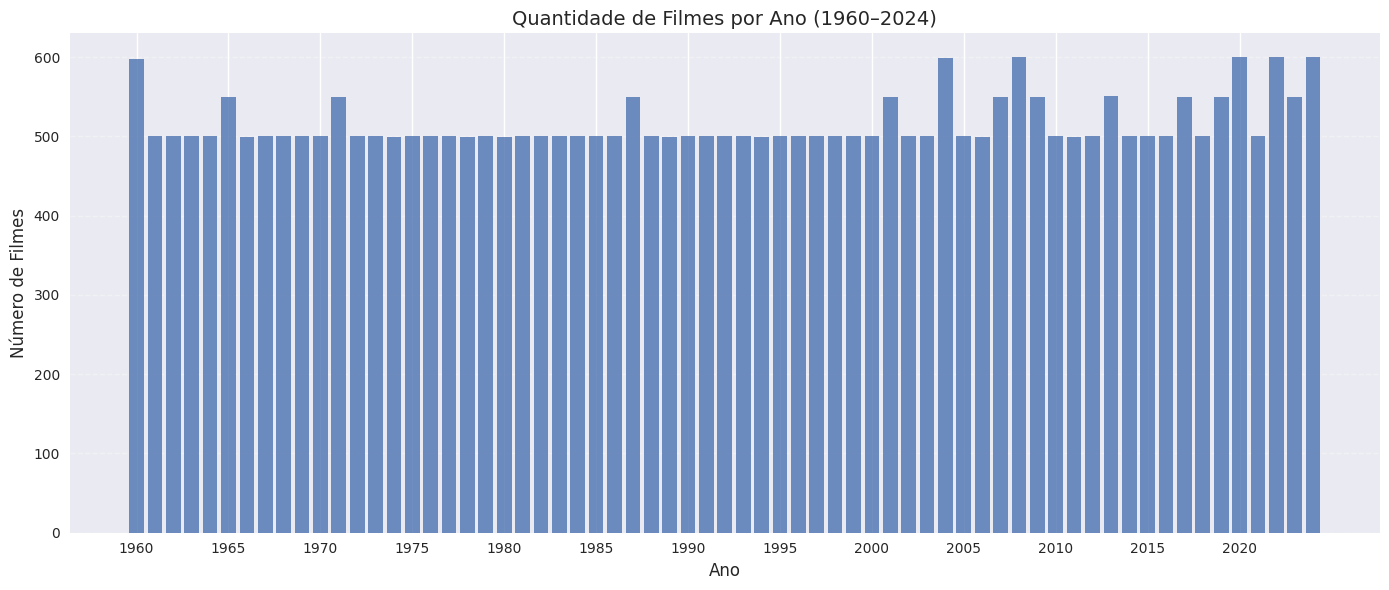

In [76]:
print("\n=== ESTATÍSTICAS DESCRITIVAS ===")
print(df.describe())

# Contagem de filmes por ano
year_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
plt.bar(year_counts.index, year_counts.values, alpha=0.8)

plt.title('Quantidade de Filmes por Ano (1960–2024)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Filmes', fontsize=12)

# Grade leve
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Exibir rótulos de ano a cada 5 anos (evita poluição visual)
plt.xticks(ticks=range(min(year_counts.index), max(year_counts.index)+1, 5))

plt.tight_layout()
plt.show()

### 3.2 Distribuição de Avaliações

Nesta etapa foram analisadas duas dimensões importantes relacionadas às avaliações dos filmes:

- **Distribuição das notas do IMDb:**  
  Um histograma foi utilizado para visualizar como as avaliações se distribuem. Essa análise permite identificar tendências como concentração de notas médias, presença de outliers e variação geral da qualidade percebida pelos usuários.

- **Classificações indicativas (MPA) mais comuns:**  
  As categorias de classificação foram contabilizadas e apresentadas em um gráfico de barras, destacando as classificações predominantes no conjunto de filmes. Isso ajuda a entender o perfil de público-alvo predominante nas obras analisadas.


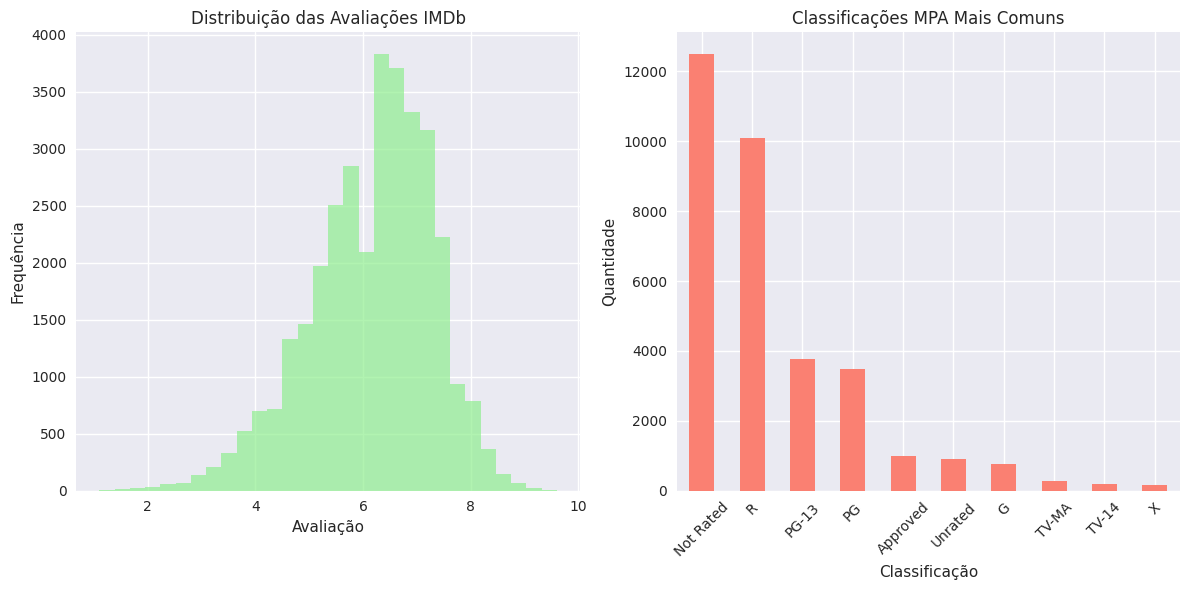

In [77]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['rating_imdb'].hist(bins=30, alpha=0.7, color='lightgreen')
plt.title('Distribuição das Avaliações IMDb')
plt.xlabel('Avaliação')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
df['rating_mpa'].value_counts().head(10).plot(kind='bar', color='salmon')
plt.title('Classificações MPA Mais Comuns')
plt.xlabel('Classificação')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4. Visualização dos Dados: Perguntas e Análises

Nesta seção, exploramos visualmente o conjunto de dados para responder perguntas iniciais e identificar padrões relevantes. As visualizações ajudam a compreender a distribuição das variáveis, relações entre atributos e possíveis comportamentos atípicos.

### Análise de Gêneros Cinematográficos (1960-2025)

#### Pergunta 1: Quais gêneros de filmes geram o maior retorno sobre investimento (ROI) médio nos filmes listados (de 1960 a 2025)?

#### Propósito e Benefícios
- **Orientar investidores** a priorizar gêneros rentáveis

#### Ações Recomendadas
- Redirecionar orçamentos para **Horror de baixo custo**

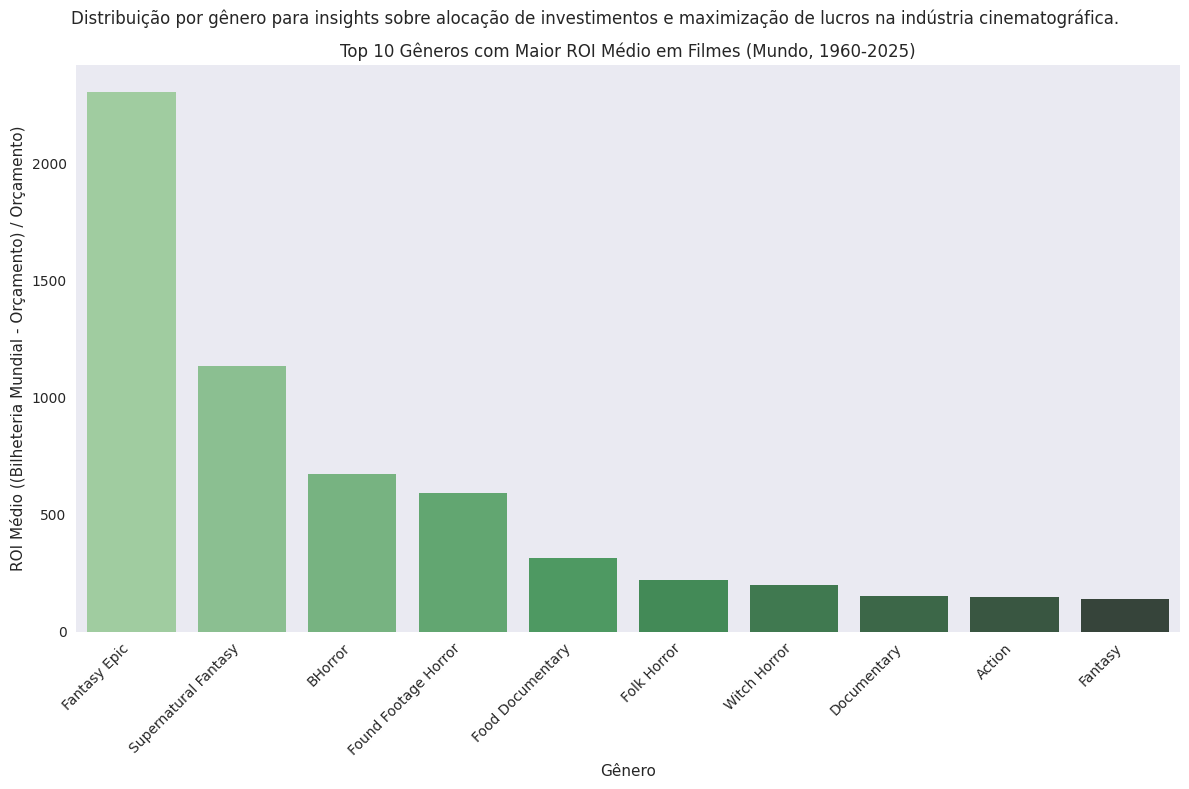

In [78]:
# Converter colunas relevantes para numérico
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['gross_world_wide'] = pd.to_numeric(df['gross_world_wide'], errors='coerce')

# Filtrar linhas onde budget e gross_world_wide não são NaN e budget > 0 para evitar divisão por zero
df_filtered = df.dropna(subset=['budget', 'gross_world_wide', 'genre'])
df_filtered = df_filtered[df_filtered['budget'] > 0]

# Calcular ROI
df_filtered['roi'] = (df_filtered['gross_world_wide'] - df_filtered['budget']) / df_filtered['budget']

# Expandir gêneros (separados por vírgula)
genres_expanded = df_filtered['genre'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
genres_expanded.name = 'genre_split'
df_expanded = df_filtered.drop('genre', axis=1).join(genres_expanded)

# Agrupar por gênero e calcular ROI médio, top 10
roi_by_genre = df_expanded.groupby('genre_split')['roi'].mean().sort_values(ascending=False).head(10)

# Configurar o plot
plt.figure(figsize=(12, 8))
sns.barplot(x=roi_by_genre.index, y=roi_by_genre.values, palette='Greens_d')

# Títulos e rótulos
plt.title('Top 10 Gêneros com Maior ROI Médio em Filmes (Mundo, 1960-2025)')
plt.suptitle('Distribuição por gênero para insights sobre alocação de investimentos e maximização de lucros na indústria cinematográfica.')
plt.ylabel('ROI Médio ((Bilheteria Mundial - Orçamento) / Orçamento)')
plt.xlabel('Gênero')

# Rotacionar labels do eixo X para melhor legibilidade
plt.xticks(rotation=45, ha='right')

# Grade e nota
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Análise de Gêneros Cinematográficos (1960-2025)

#### Pergunta 2: Quais gêneros recebem mais indicações ao Oscar nos filmes listados (de 1960 a 2025)?

#### Propósito e Benefícios
- Guiar produtores a investir em gêneros premiados
- Elevar prestígio e captar financiamentos

#### Ações Recomendadas
- **Priorizar roteiros de drama e comédia** para campanhas de premiação
- **Desenvolver projetos de comédia** com potencial crítico
- **Criar parcerias** com escritores especializados nos genêros mais premiados

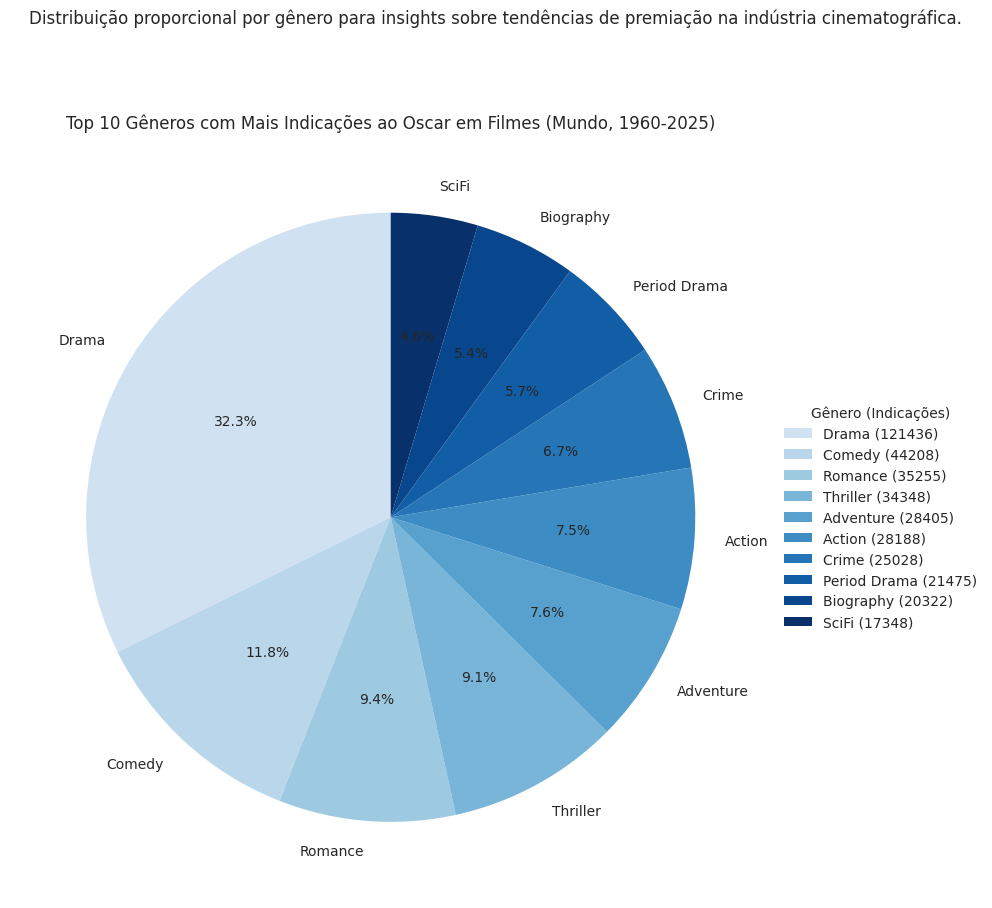

In [79]:
# Converter nomination para numérico
df['nomination'] = pd.to_numeric(df['nomination'], errors='coerce')

# Filtrar linhas onde nomination não é NaN (embora faltantes sejam baixos, por consistência)
df_filtered = df.dropna(subset=['nomination', 'genre'])

# Expandir gêneros (separados por vírgula)
genres_expanded = df_filtered['genre'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
genres_expanded.name = 'genre_split'
df_expanded = df_filtered.drop('genre', axis=1).join(genres_expanded)

# Agrupar por gênero e somar nominations, top 10
genre_nominations = df_expanded.groupby('genre_split')['nomination'].sum().sort_values(ascending=False).head(10)

# Configurar o plot
plt.figure(figsize=(10, 10))
plt.pie(genre_nominations.values, labels=genre_nominations.index, autopct='%1.1f%%', colors=plt.cm.Blues(np.linspace(0.2, 1, len(genre_nominations))), startangle=90)

# Títulos
plt.title('Top 10 Gêneros com Mais Indicações ao Oscar em Filmes (Mundo, 1960-2025)')
plt.suptitle('Distribuição proporcional por gênero para insights sobre tendências de premiação na indústria cinematográfica.')

# Legenda com contagens absolutas
plt.legend([f"{genre} ({count})" for genre, count in zip(genre_nominations.index, genre_nominations.values)], title='Gênero (Indicações)', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()